In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xml.etree.ElementTree as ET
import os,glob,sys
import pylheV
import scipy as sc

sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
sns.set_palette(sns.color_palette("Paired"))

In [7]:
particlesDict = {}

In [8]:
with open("particles.xml") as f:
    xmlStr = f.read()
    xmlStr = "<root>\n" + xmlStr[:] + "</root>" 
root = ET.fromstring(xmlStr)

In [9]:
for particle in root:
    particleData  = particle.attrib
    pid = int(particleData['id'])
    particlesDict[pid] = {}
    for attr,val in particle.attrib.items():
        try:
            particlesDict[pid][attr] = eval(val) #Try to evaluate attribute
        except:
            particlesDict[pid][attr] = val

In [138]:
def getKey(my_value,d):    
    return next(key for key, value in d.items() if value == my_value)

In [189]:
def dictId(file_name):
    eventDict = {'Events': {}, 'Count': {}}

    i = 0
    for n,e in enumerate(pylheV.readLHE(file_name)):
        f_ptc = []
        for ptc in e.particles:
            if ptc.status > 0:
                f_ptc.append(ptc.id)
        f_ptc = np.sort(f_ptc)
        print(f_ptc)
        if (f_ptc in eventDict['Events'].values()) == False:
            eventDict['Events'][i] = f_ptc
            eventDict['Count'][i] = 1        
            i+=1
        else:
            eventDict['Count'][getKey(f_ptc,eventDict['Events'])] +=1

    return eventDict


In [184]:
#No sort
def dictName1(file_name):
    
    eventDict = {}
    for n,e in enumerate(pylheV.readLHE(file_name)):
        f_ptc = ''
        for ptc in e.particles:
            if ptc.status > 0:
                if ptc.id > 0:
                    f_ptc = f_ptc + particlesDict[ptc.id]['name']
                else:
                    f_ptc = f_ptc + particlesDict[abs(ptc.id)]['antiName']
        if (eventDict.get(f_ptc)) == None:
            eventDict[f_ptc] = 1       
        else:
            eventDict[f_ptc] +=1
    
    return eventDict

In [230]:
def cleaner(f_ptc):
    f_ptc = np.sort(f_ptc)
    final = [f_ptc[0]]
    count = [1]
    j = 0
    for i in range(len(f_ptc)-1):
        if f_ptc[i+1] != f_ptc[i]:
            final.append(f_ptc[i+1])
            count.append(1)
            j+=1
        else:
            count[j] += 1
        
            
    return final, count
            
            


In [246]:
def dictName(file_name):
    
    eventDict = {}
    for n,e in enumerate(pylheV.readLHE(file_name)):
        f_ptc = []
        for ptc in e.particles:
            if ptc.status > 0:
                f_ptc.append(ptc.id)
   
        f_ptc = np.sort(f_ptc)
        f_ptc, count = cleaner(f_ptc)
        final = ''
        for i,f in enumerate(f_ptc):
            if f > 0:
                if count[i] == 1:
                    final = final + particlesDict[f]['name']
                else:
                    final = final + str(count[i]) +  particlesDict[f]['name']
            else:
                if count[i] == 1:
                    final = final + particlesDict[abs(f)]['antiName']
                else:
                    final = final + str(count[i]) +  particlesDict[abs(f)]['antiName']
                
        if (eventDict.get(final)) == None:
            eventDict[final] = 1       
        else:
            eventDict[final] +=1
    
    return eventDict

In [247]:
eventDict1 = dictName('output_12GeV.lhe')
#for key, value in eventDict1.items():
    #print(key)
print(eventDict1)

{'3$K^-$2$\\pi^-$20$\\gamma$3$\\pi^+$2$K^+$': 1, '$\\bar{p}^-$5$\\pi^-$$e^+$$e^-$12$\\gamma$5$\\pi^+$$p^+$': 1, '$K^-$$\\pi^-$$\\bar{\\nu}_\\mu$$\\mu^-$8$\\gamma$$K_L^0$2$\\pi^+$$K^+$': 1, '6$\\pi^-$22$\\gamma$$K_L^0$4$\\pi^+$2$K^+$': 1, '$K^-$3$\\pi^-$$e^+$$\\nu_e$20$\\gamma$2$\\pi^+$$K^+$': 1, '2$\\pi^-$$\\mu^+$$\\nu_\\mu$18$\\gamma$2$K_L^0$$\\pi^+$': 1, '$K^-$3$\\pi^-$14$\\gamma$$K_L^0$4$\\pi^+$': 1, '$K^-$6$\\pi^-$13$\\gamma$6$\\pi^+$$K^+$': 4, '2$K^-$4$\\pi^-$$e^+$$\\nu_e$10$\\gamma$2$K_L^0$4$\\pi^+$$K^+$': 1, '2$K^-$3$\\pi^-$$\\mu^+$$e^+$$e^-$$\\nu_\\mu$9$\\gamma$2$K_L^0$3$\\pi^+$$K^+$': 1, '$K^-$7$\\pi^-$$\\mu^+$$\\nu_\\mu$9$\\gamma$$K_L^0$6$\\pi^+$$K^+$': 1, '2$K^-$4$\\pi^-$$e^+$$\\nu_e$12$\\gamma$5$\\pi^+$': 1, '$\\bar{n}^0$$K^-$6$\\pi^-$12$\\gamma$$K_L^0$6$\\pi^+$$p^+$': 1, '$K^-$3$\\pi^-$$\\mu^+$$\\nu_\\mu$14$\\gamma$2$K_L^0$2$\\pi^+$$K^+$': 2, '5$\\pi^-$18$\\gamma$4$\\pi^+$$K^+$': 2, '$\\bar{p}^-$$K^-$5$\\pi^-$13$\\gamma$$K_L^0$6$\\pi^+$$p^+$': 1, '$K^-$3$\\pi^-$$\\bar{\\nu

In [249]:
file_name = ['output_1GeV.lhe','output_3GeV.lhe','output_6GeV.lhe','output_9GeV.lhe','output_12GeV.lhe', 'output_15GeV.lhe']
eventDict = []
for file in file_name:
    eventDict.append(dictName(file))

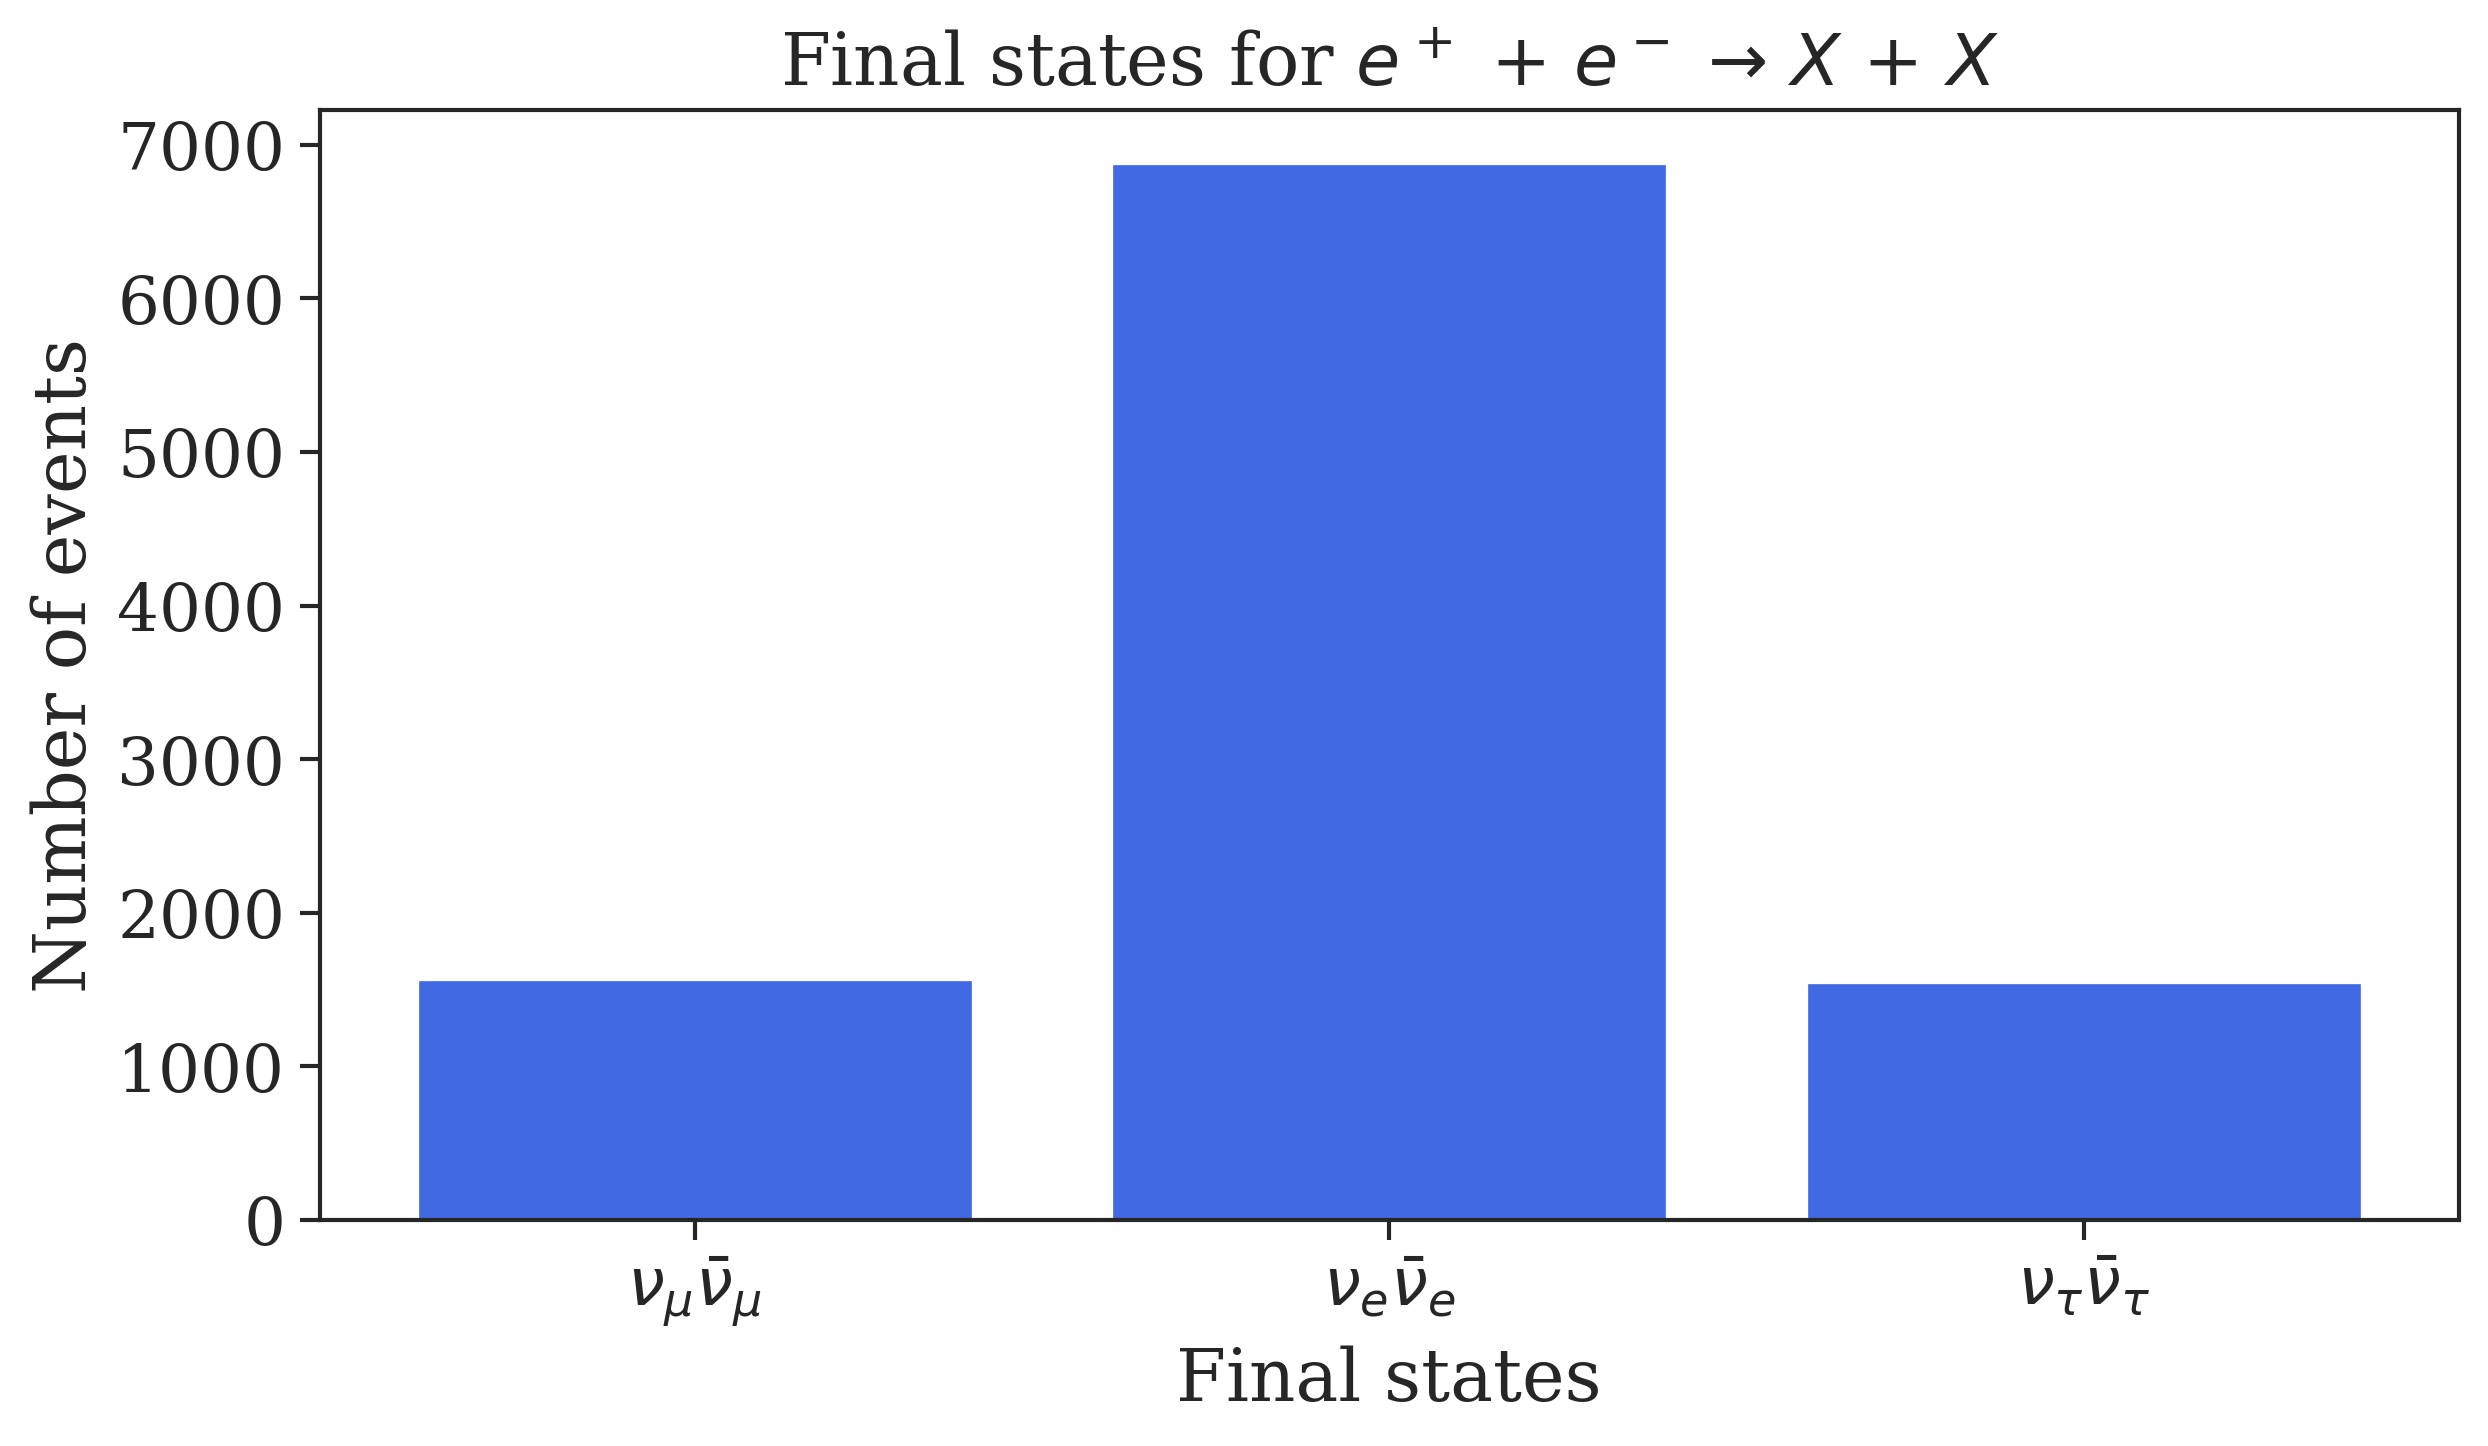

In [154]:
fig = plt.figure(figsize = [9.2,4.9], dpi = 300)

plt.bar(eventDict[0].keys(), eventDict[0].values(), color = 'royalblue')


plt.title(r'Final states for $e^+$ $+$ $e^-$ $\to$ $X$ $+$ $X$')
plt.xlabel(r'Final states')
plt.ylabel(r'Number of events')
plt.show()

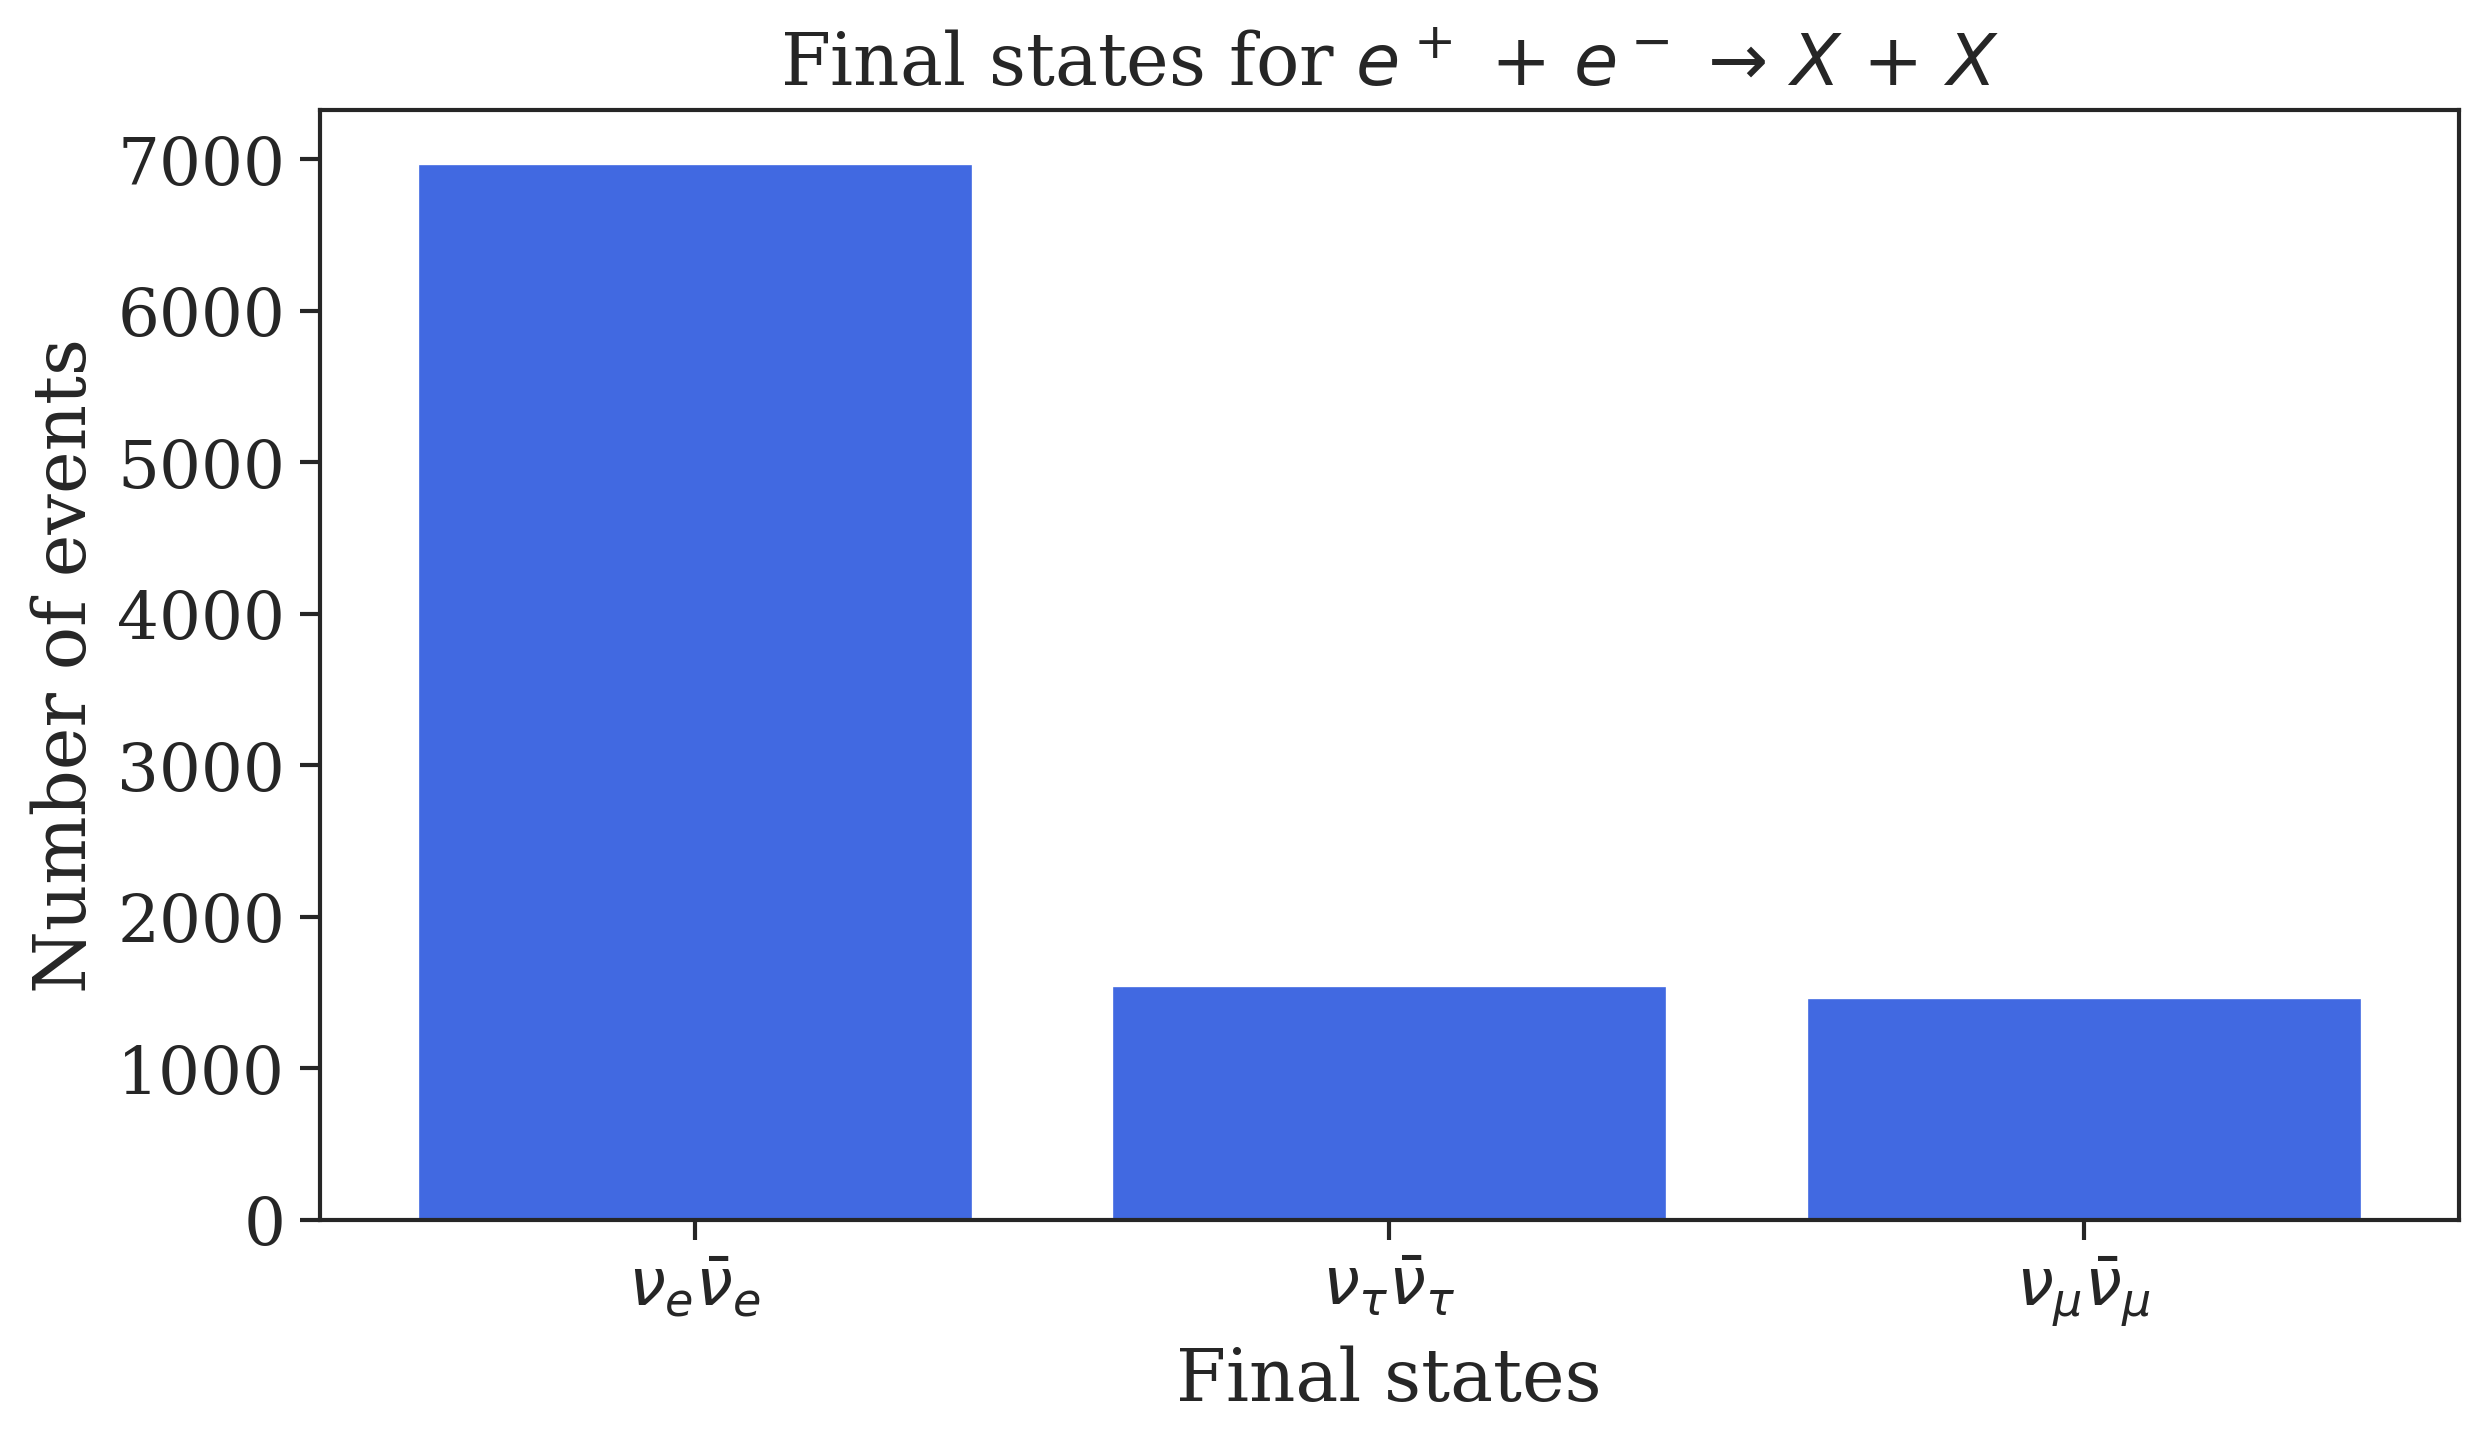

In [155]:
fig = plt.figure(figsize = [9.2,4.9], dpi = 300)

plt.bar(eventDict[1].keys(), eventDict[1].values(), color = 'royalblue')


plt.title(r'Final states for $e^+$ $+$ $e^-$ $\to$ $X$ $+$ $X$')
plt.xlabel(r'Final states')
plt.ylabel(r'Number of events')
plt.show()

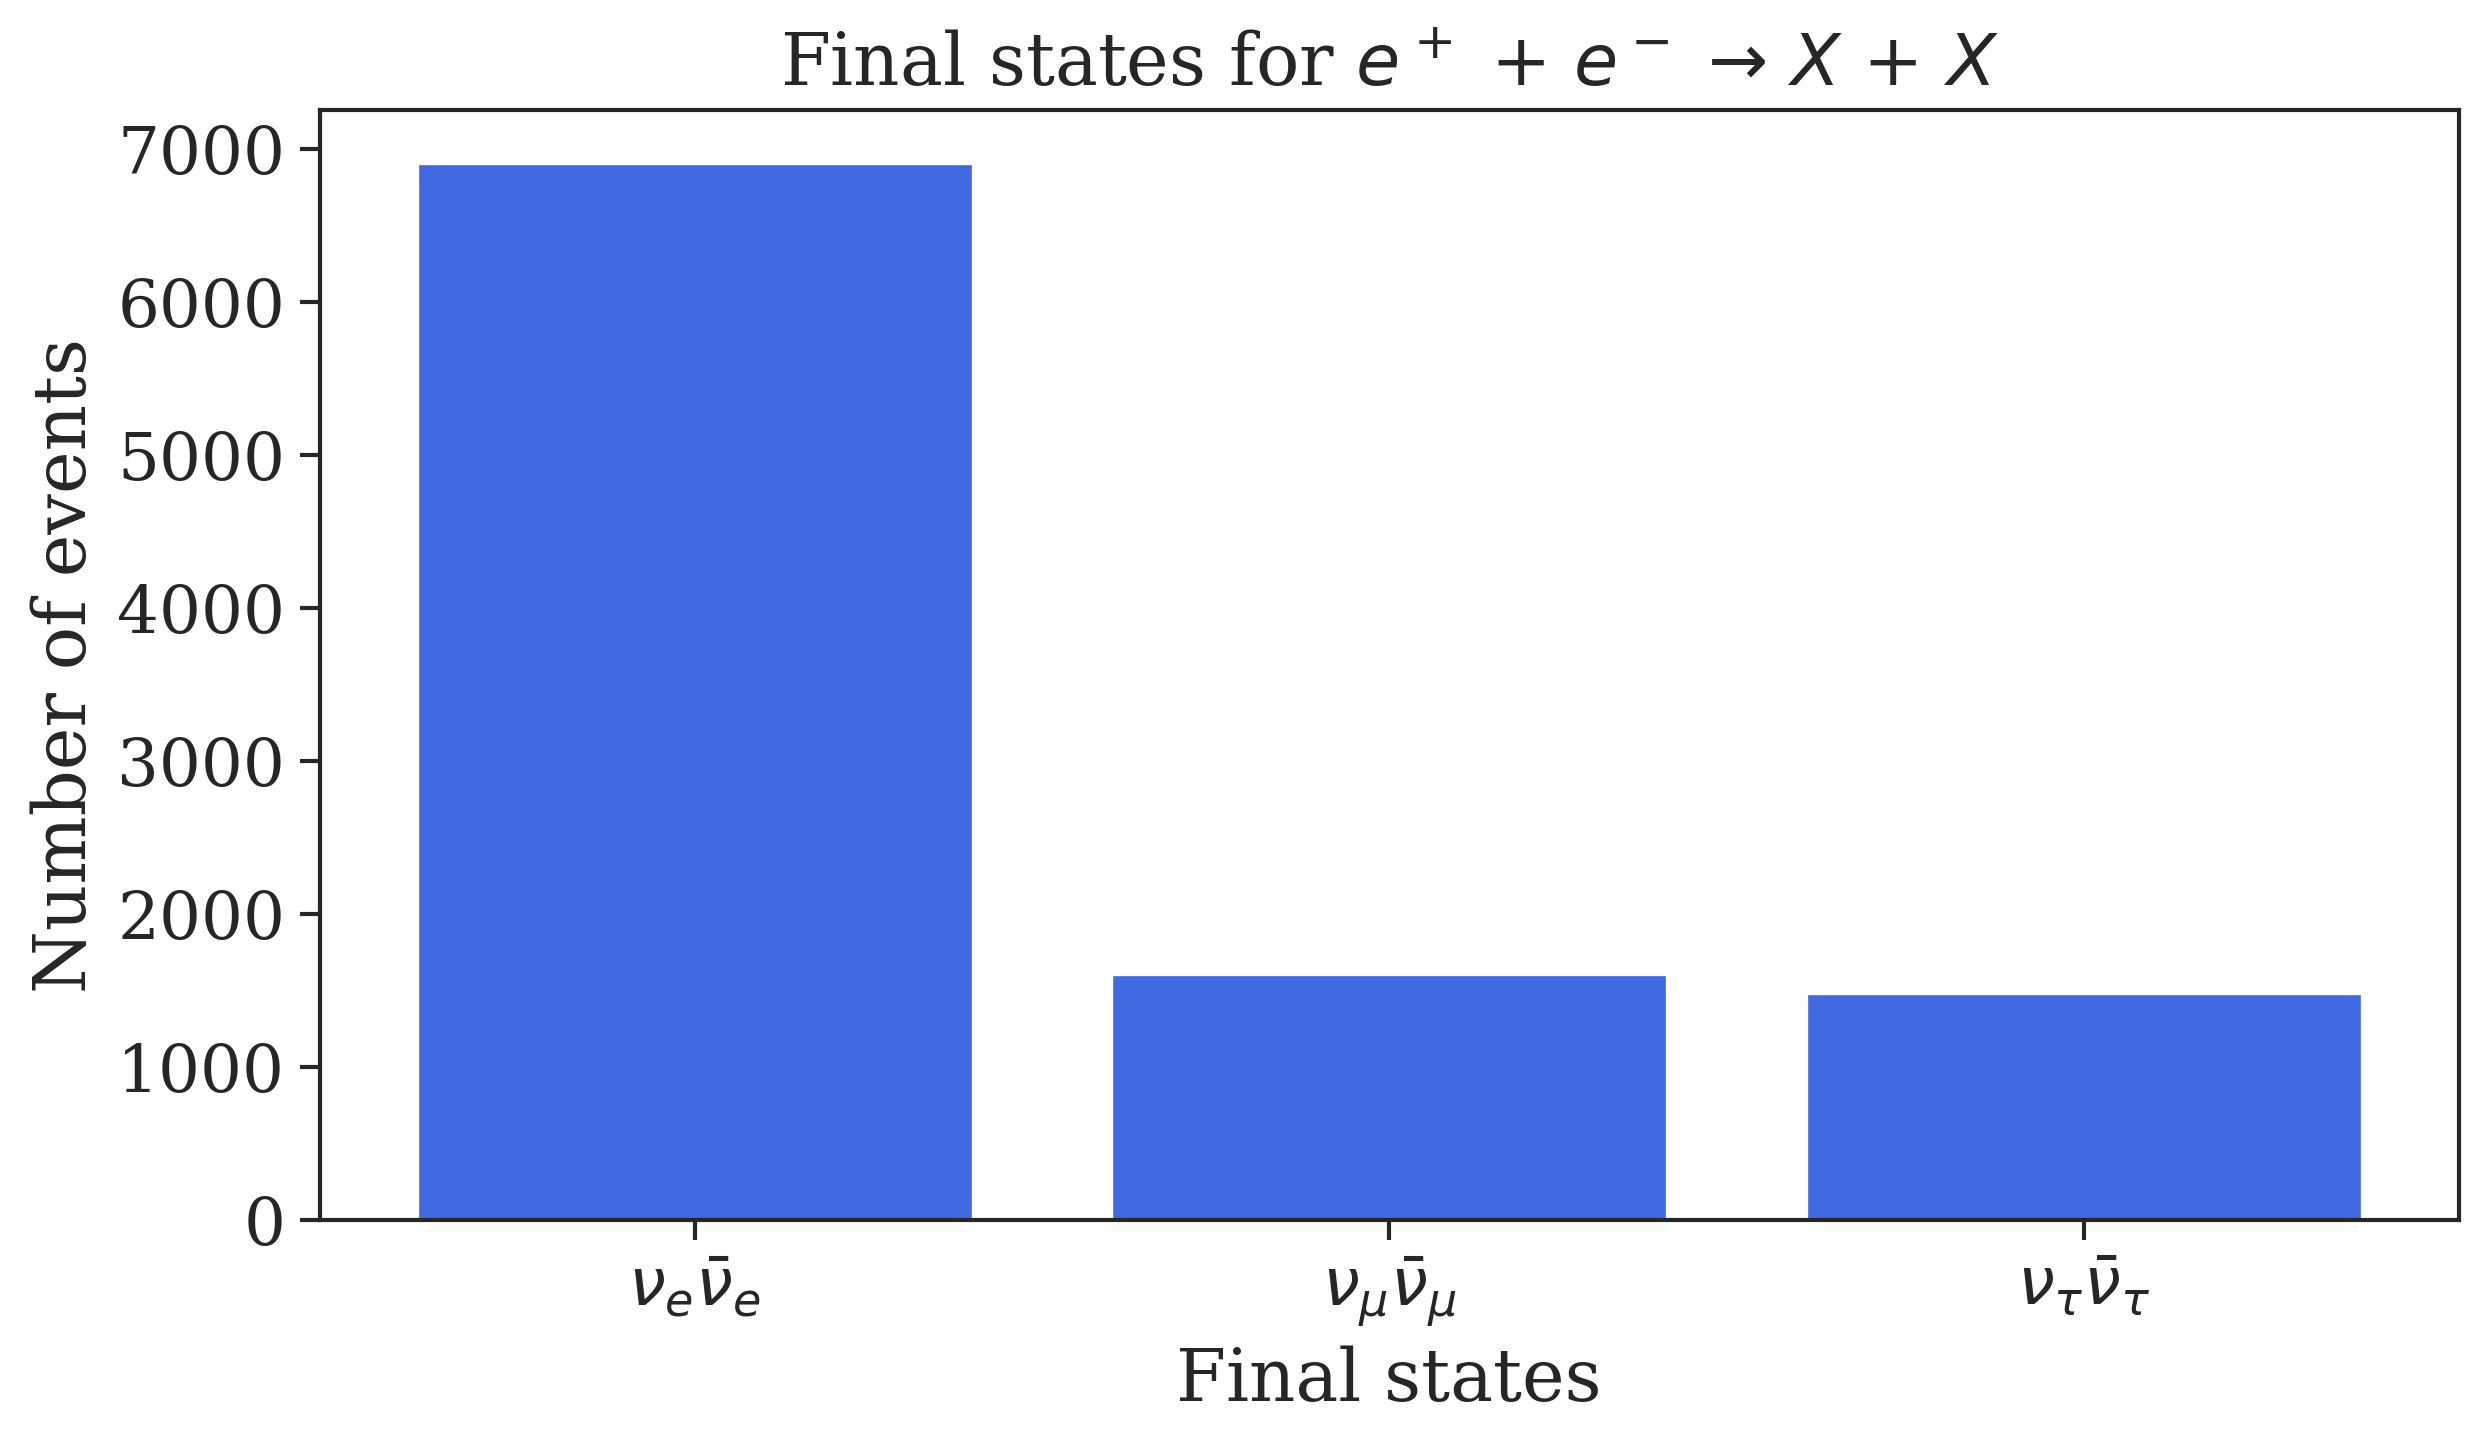

In [156]:
fig = plt.figure(figsize = [9.2,4.9], dpi = 300)

plt.bar(eventDict[2].keys(), eventDict[2].values(), color = 'royalblue')


plt.title(r'Final states for $e^+$ $+$ $e^-$ $\to$ $X$ $+$ $X$')
plt.xlabel(r'Final states')
plt.ylabel(r'Number of events')
plt.show()

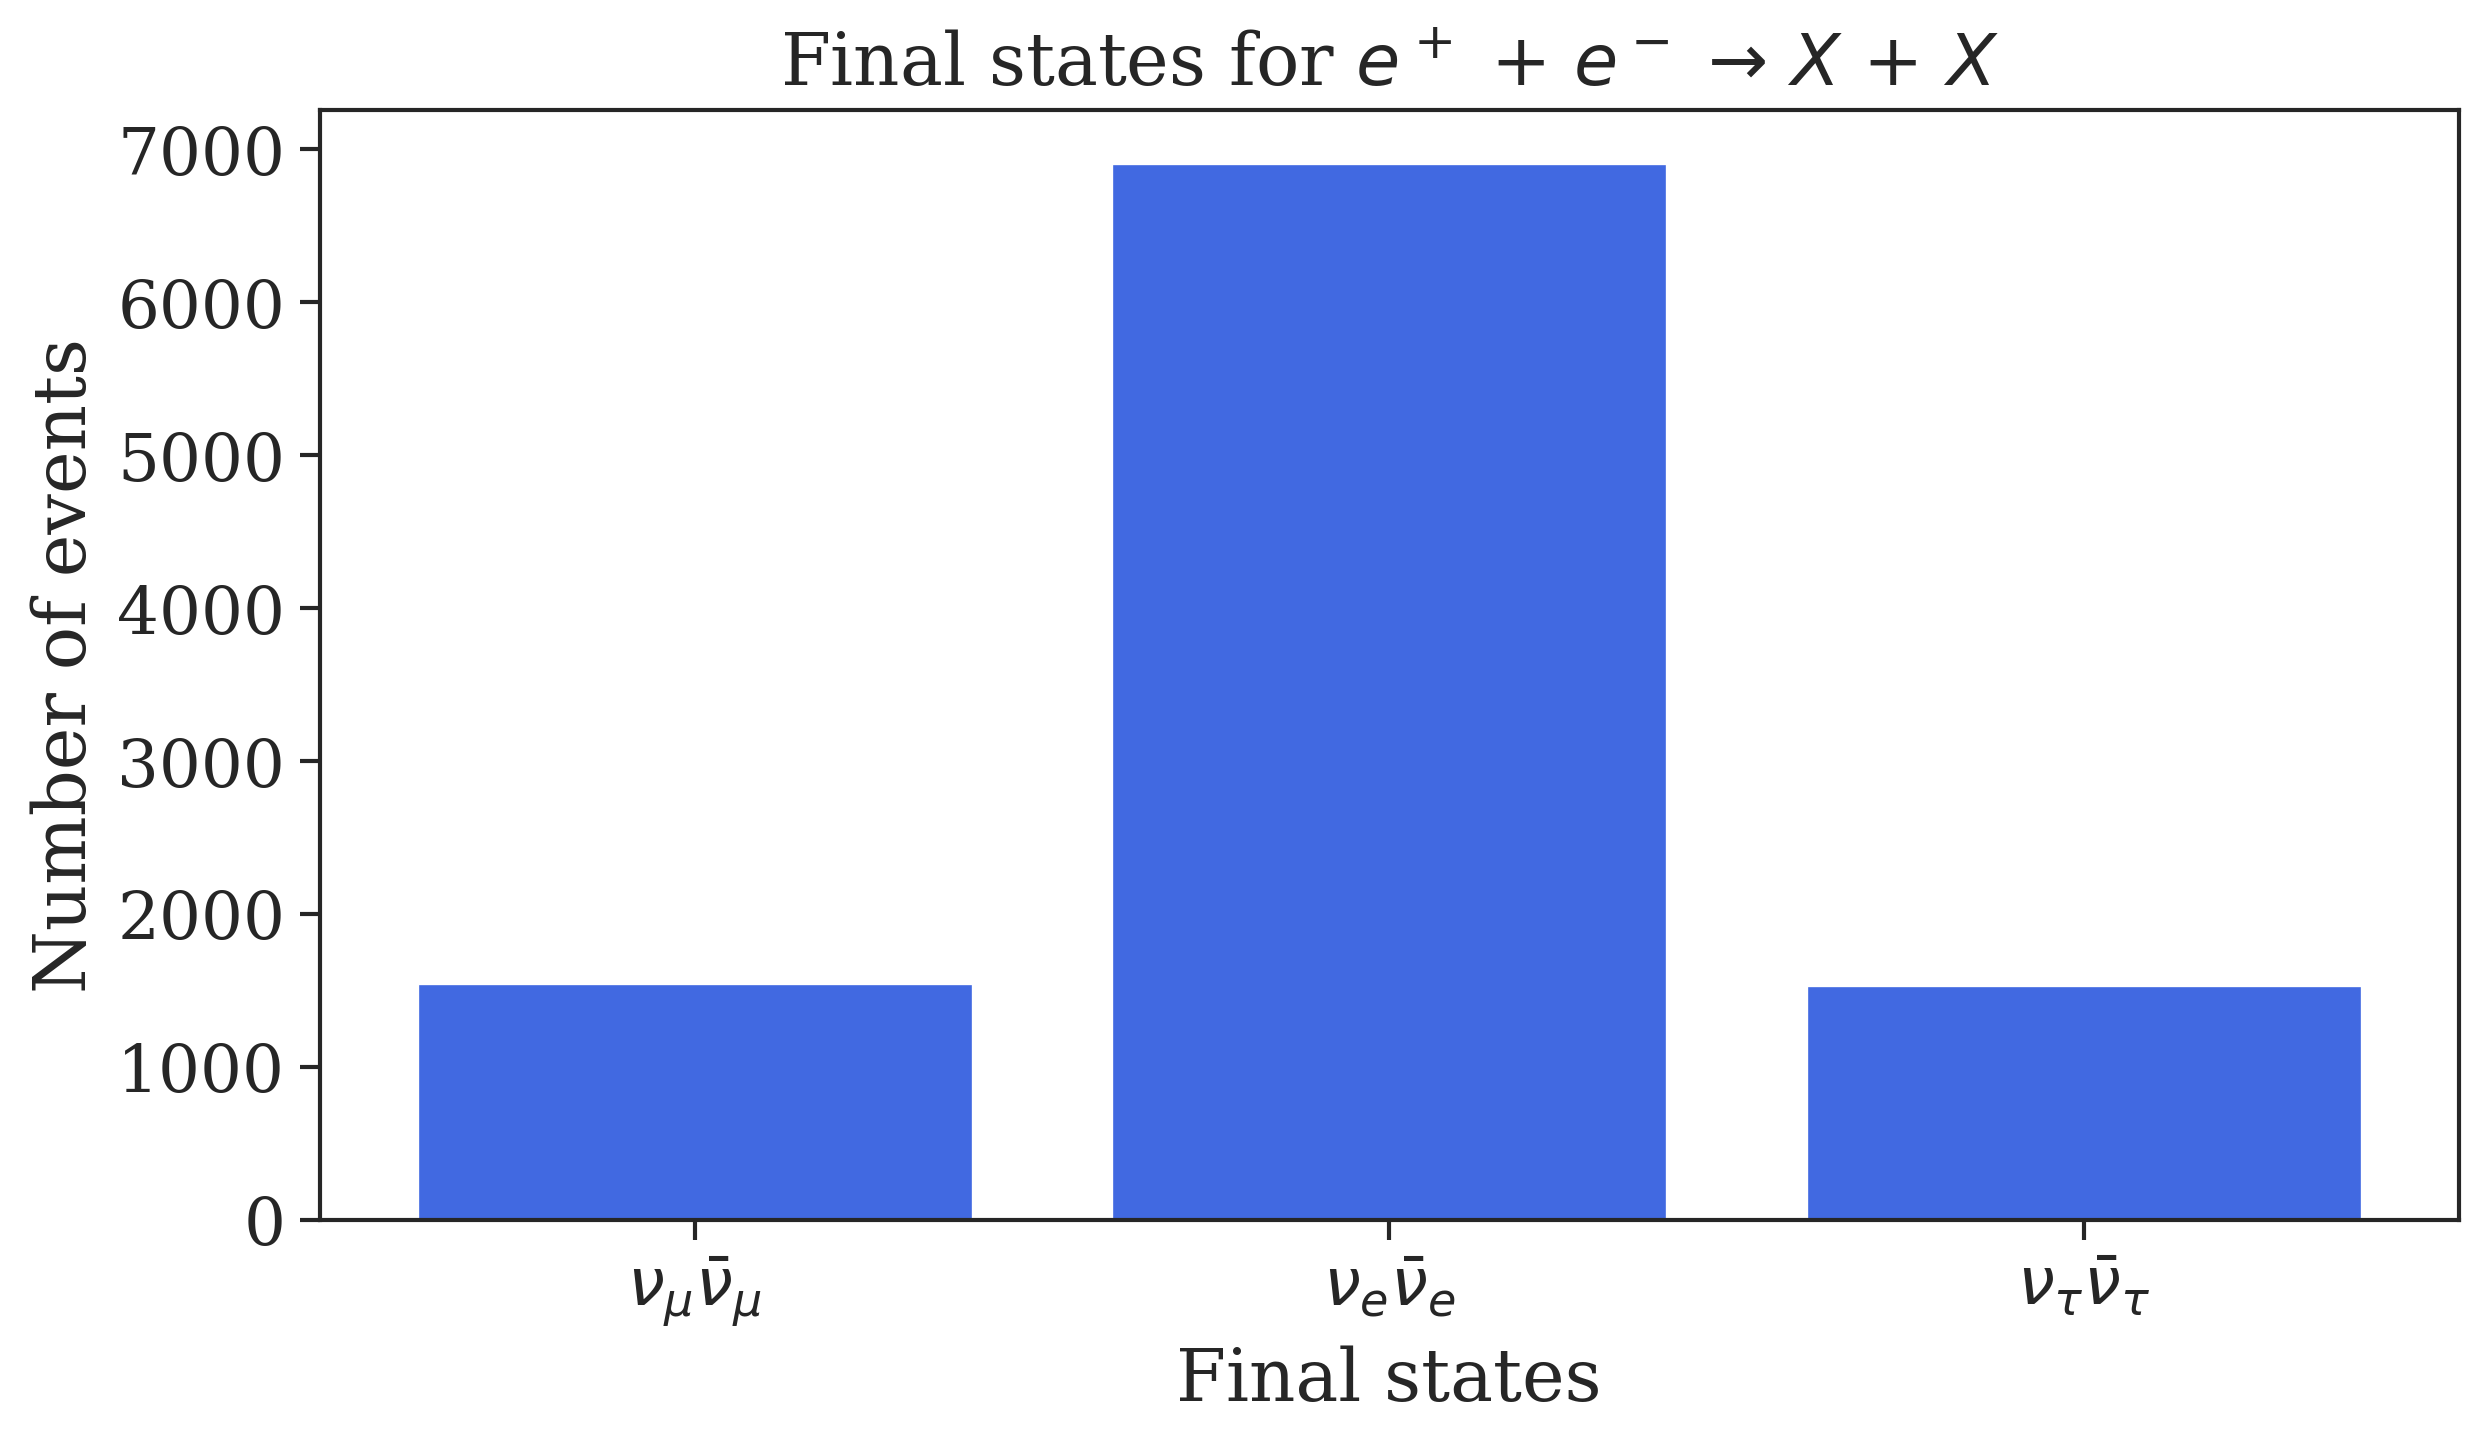

In [157]:
fig = plt.figure(figsize = [9.2,4.9], dpi = 300)

plt.bar(eventDict[3].keys(), eventDict[3].values(), color = 'royalblue')


plt.title(r'Final states for $e^+$ $+$ $e^-$ $\to$ $X$ $+$ $X$')
plt.xlabel(r'Final states')
plt.ylabel(r'Number of events')
plt.show()

In [248]:
fig = plt.figure(figsize = [9.2,4.9], dpi = 300)

plt.bar(eventDict[4].keys(), eventDict[4].values(), color = 'royalblue')


plt.title(r'Final states for $e^+$ $+$ $e^-$ $\to$ $X$ $+$ $X$')
plt.xlabel(r'Final states')
plt.ylabel(r'Number of events')
plt.show()

KeyboardInterrupt: 

In [ ]:
fig = plt.figure(figsize = [9.2,4.9], dpi = 300)

plt.bar(eventDict[5].keys(), eventDict[5].values(), color = 'royalblue')


plt.title(r'Final states for $e^+$ $+$ $e^-$ $\to$ $X$ $+$ $X$')
plt.xlabel(r'Final states')
plt.ylabel(r'Number of events')
plt.show()

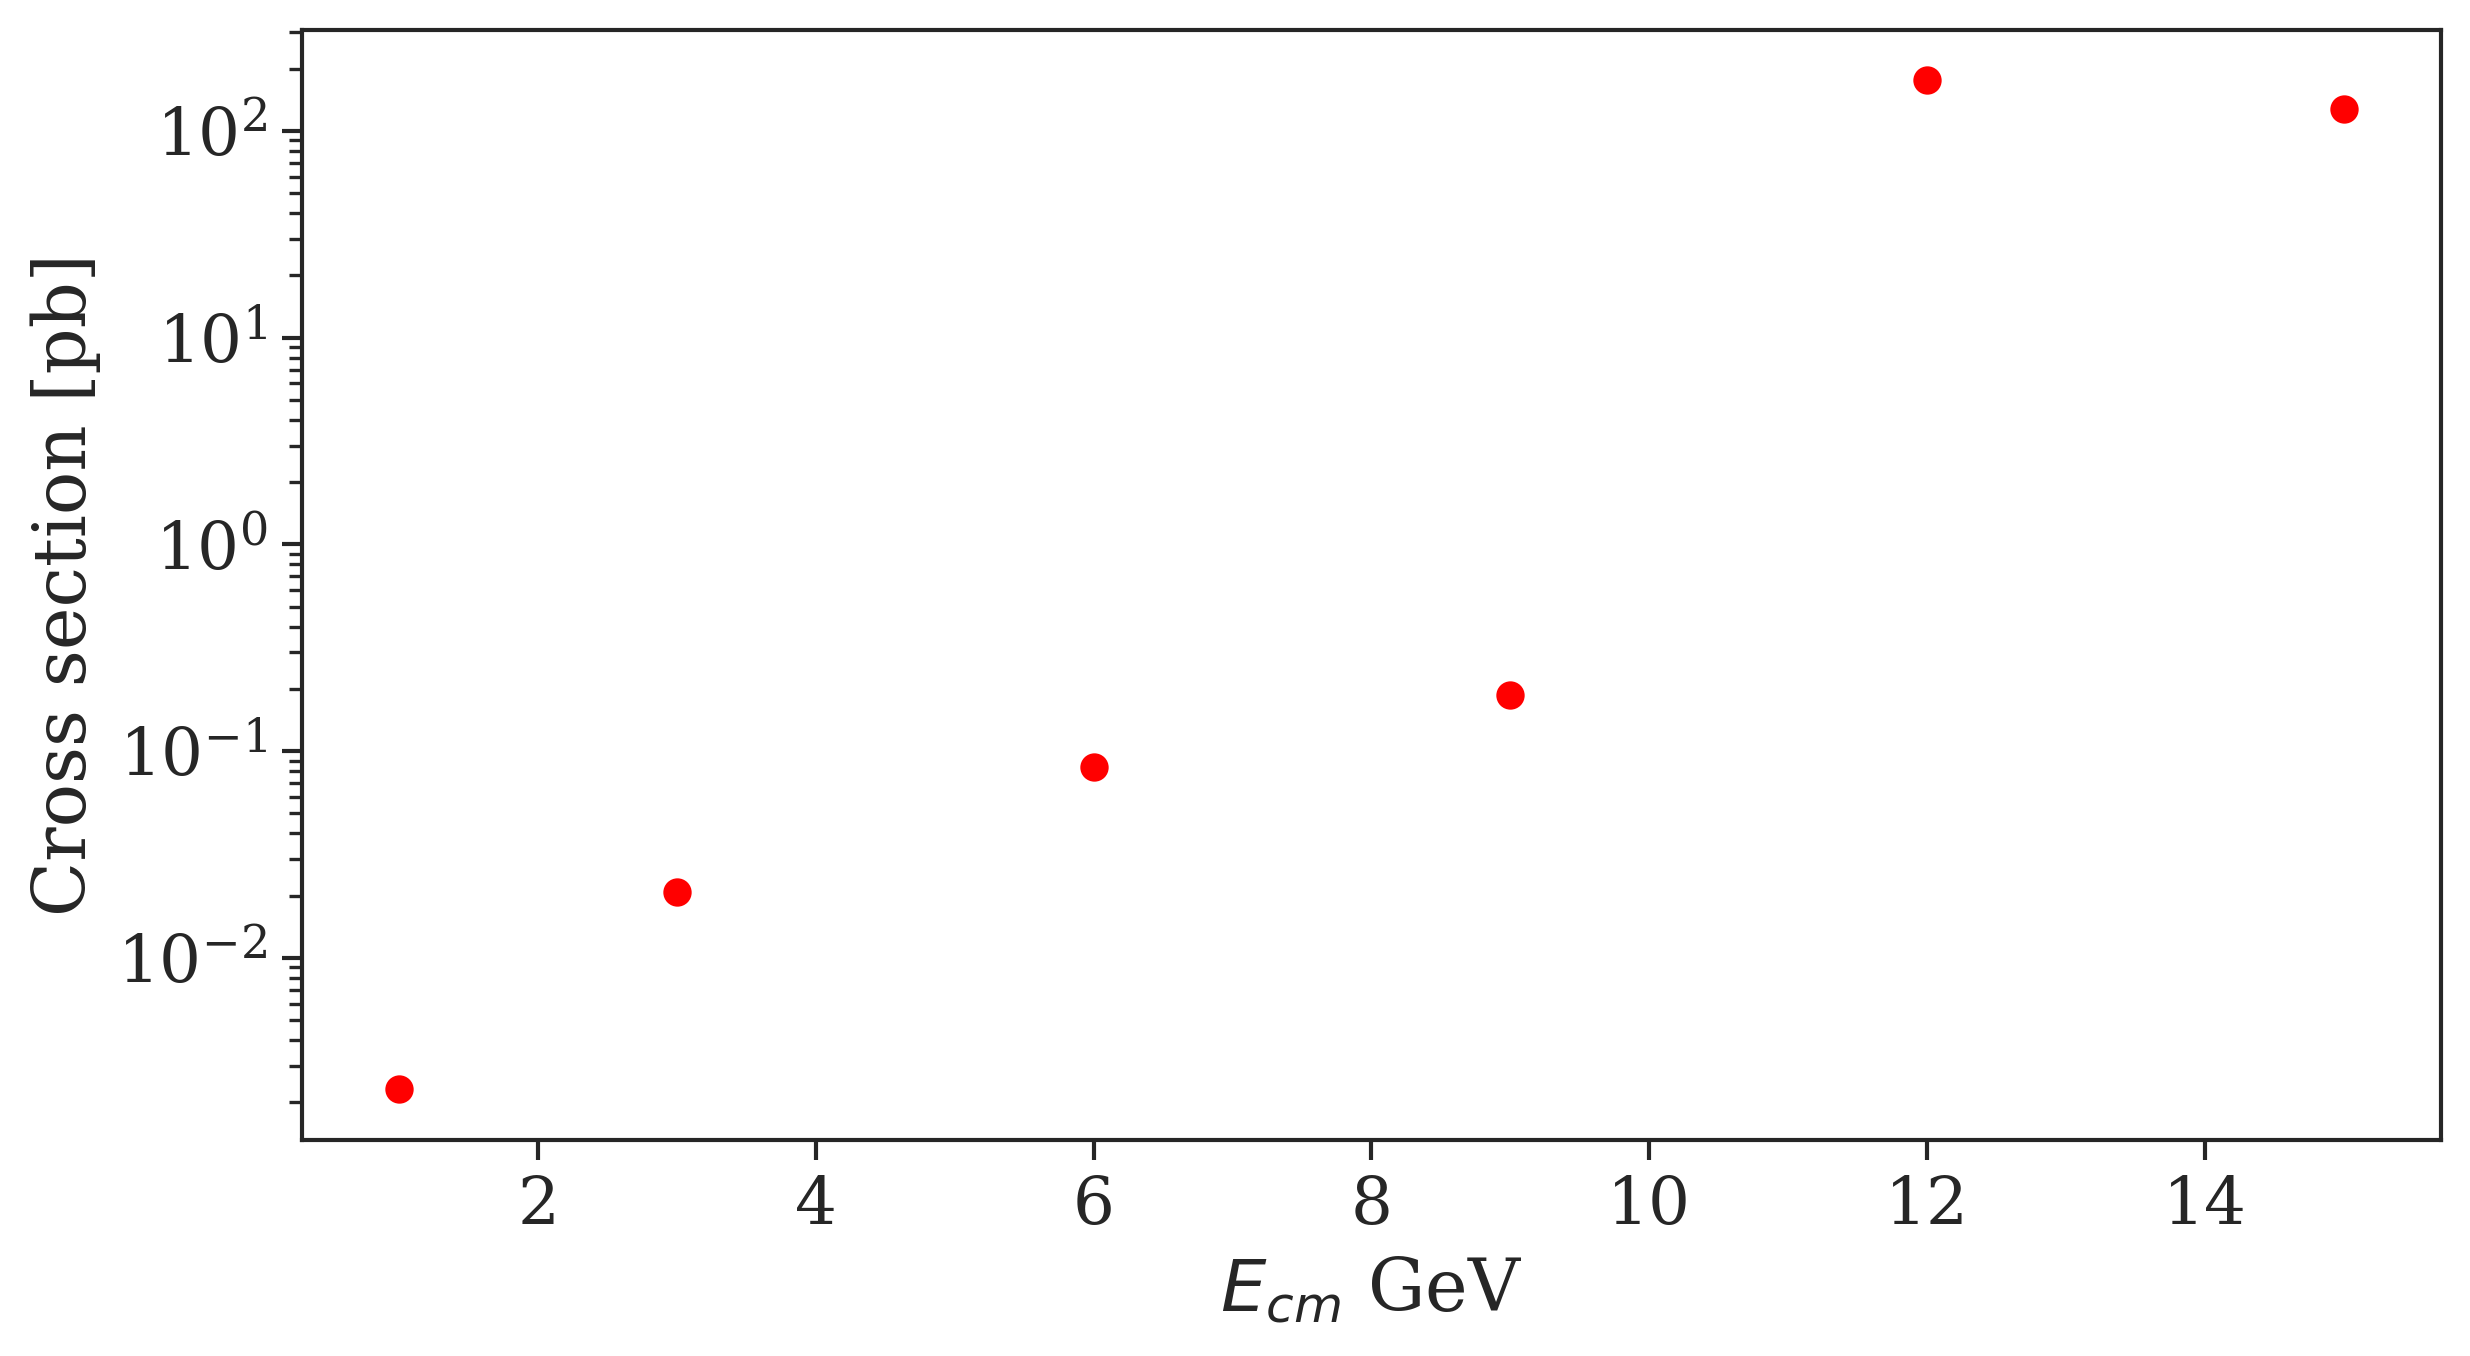

In [257]:
cross_section = [0.002311,0.02074,0.08328,0.1866,175.6,127.9 ]
E_GeV =[1,3,6,9,12,15] 
fig = plt.figure(figsize = [9.2,4.9], dpi = 300)
plt.scatter(E_GeV,cross_section, color = 'red',linewidth = 2)
plt.ylabel('Cross section [pb]')
plt.xlabel(r'$E_{cm}$ GeV')
plt.yscale('log')
plt.show()